<a href="https://colab.research.google.com/github/hessikaveh/SimpleStatisticsHEP/blob/main/Artificial_uncertainties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
def log_likelihood_2(theta_, n, lda0, ldaPlus, ldaMinus, sigma):
  theta = theta_[0]
  v = theta_[1:]
  lda = h(theta, lda0, ldaPlus, ldaMinus) - v*sigma
  ln_p_n_lambda = n*np.log(lda) - lda
  ln_L = np.sum(ln_p_n_lambda) - theta*theta/2 - np.sum(v*v)/2
  return ln_L

In [3]:
def h(theta, lda0, ldaPlus, ldaMinus):
  if theta >= 0 :
    return lda0 + theta*(ldaPlus - lda0)
  else:
    return lda0 - theta*(lda0 - ldaMinus)


In [4]:
from scipy.stats import genexpon
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


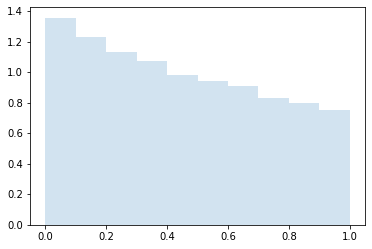

In [5]:
from scipy.stats import bradford
fig, ax = plt.subplots(1, 1)
c = 0.9
r = bradford.rvs(c, size=100000)

r_lda0 = bradford.rvs(c, size=100000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

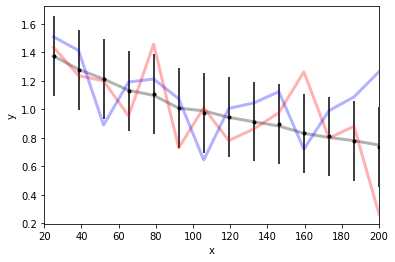

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = 14
(n, bins, patches) = ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=m)
(n_, bins_, patches_) = ax.hist(r_lda0, density=True, histtype='stepfilled', alpha=0.2, bins=m)

sigma = np.full(m, 0.02*m)
#sigma = np.log(n)
lda0 = n_
ldaPlus = n + 0.2 * np.random.randn(len(n))
ldaMinus = n - 0.2 * np.random.randn(len(n))

x0 = np.linspace(25, 200, m)
plt.errorbar(x0, n, yerr=sigma, fmt=".k", capsize=0)
plt.xlim(20, 200)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x0, lda0, "k", alpha=0.3, lw=3)
plt.plot(x0, ldaPlus, "r", alpha=0.3, lw=3)
plt.plot(x0, ldaMinus, "b", alpha=0.3, lw=3)

plt.show()

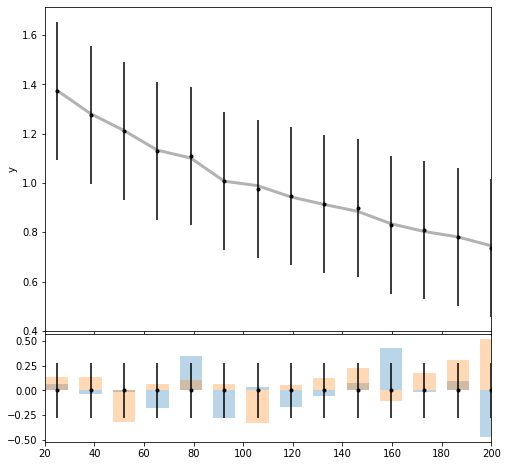

In [7]:
from scipy.optimize import minimize
nll = lambda *args: -log_likelihood_2(*args)
initial = np.zeros(m+1) + 0.2 * np.random.randn(m+1) 
soln = minimize(nll, initial, args=(n, lda0, ldaPlus, ldaMinus, sigma))
#print(soln.x)
theta0 = soln.x[0]

fig, axs = plt.subplots(2, 1,sharex=True, gridspec_kw={'height_ratios': [3, 1]},figsize=(8,8))
fig.subplots_adjust(hspace=0.01)

axs[0].errorbar(x0, n, yerr=sigma, fmt=".k", capsize=0)
axs[0].set_xlim(20, 200)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x0, h(theta0, lda0, ldaPlus, ldaMinus) - soln.x[1:]*sigma, "k", alpha=0.3, lw=3)

axs[1].bar(x0, ldaPlus-n, width=9, alpha=0.3, lw=3)
axs[1].bar(x0, ldaMinus-n, width=9, alpha=0.3, lw=3)
axs[1].errorbar(x0, n-n, yerr=sigma, fmt=".k")
#axs[1].errorbar(x0, x-x, yerr=soln.x[1:], fmt=".k")
fig.show()

In [8]:
theta0_list = []
soln_list = []
n_list = []
nn_list = []
for m in range(5, 100):
  (n, bins, patches) = ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=m)
  (n_, bins_, patches_) = ax.hist(r_lda0, density=True, histtype='stepfilled', alpha=0.2, bins=m)

  sigma = np.full(m, 0.008*m)
  #sigma = np.log(n/10000)
  #sigma = np.full(m, 0.2)
  #lda0 = n + np.full(len(n), 0.0001*m) + 0.00003*np.random.randn(len(n))
  #lda0 = n + 0.003*np.random.randn(len(n))
  lda0 = n_
  n_list.append(n)
  nn_list.append(n_)
  ldaPlus = n + 0.08 * np.random.randn(len(n))
  ldaMinus = n - 0.08 * np.random.randn(len(n))

  nll = lambda *args: -log_likelihood_2(*args)
  initial = np.zeros(m+1) + 0.1 * np.random.randn(m+1) 
  soln = minimize(nll, initial, args=(n, lda0, ldaPlus, ldaMinus, sigma))
  
  soln_list.append((soln.x).tolist())
  #print(soln.x)
  theta0 = soln.x[0]
  theta0_list.append(theta0)

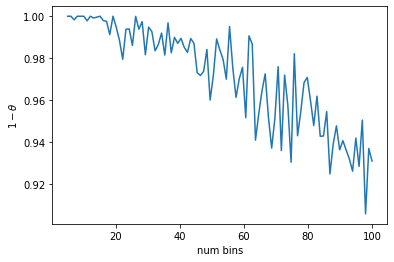

In [9]:
fig, ax = plt.subplots(1, 1)
nbins = np.linspace(5, 100, len(theta0_list))
ax.plot(nbins, [1-abs(theta) for theta in theta0_list])
#ax.set_ylim(0., 1)
ax.set_xlabel("num bins")
ax.set_ylabel(r'$1-\theta$')
fig.show()
fig.savefig("theta.png", dpi=150)

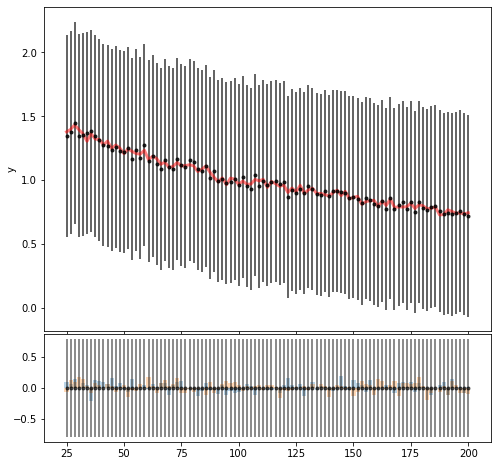

In [10]:
fig, axs = plt.subplots(2, 1,sharex=True, gridspec_kw={'height_ratios': [3, 1]},figsize=(8,8))
fig.subplots_adjust(hspace=0.01)

x0 = np.linspace(25, 200, m)
axs[0].errorbar(x0, n, yerr=sigma, fmt=".k", alpha=0.8, capsize=0.)
#axs[0].set_ylim(-5, 1000)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x0, h(theta0, lda0, ldaPlus, ldaMinus) - soln.x[1:]*sigma, "r", alpha=0.5, lw=3)

axs[1].bar(x0, ldaPlus-n, width=(200-25)/m, alpha=0.3, lw=3)
axs[1].bar(x0, ldaMinus-n, width=(200-25)/m, alpha=0.3, lw=3)
axs[1].errorbar(x0, n-n, yerr=sigma, fmt=".k", alpha=0.6)
#axs[1].errorbar(x0, x-x, yerr=soln.x[1:], fmt=".k")
fig.show()

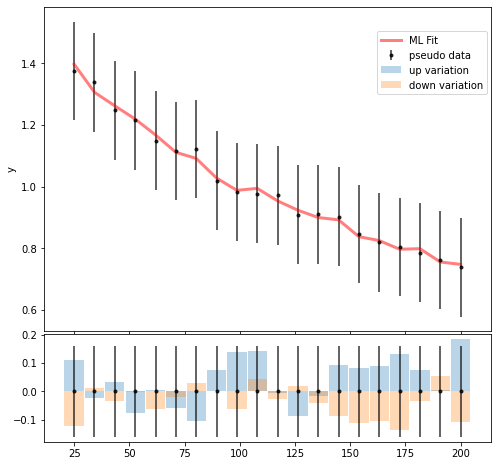

In [11]:
fig, axs = plt.subplots(2, 1,sharex=True, gridspec_kw={'height_ratios': [3, 1]},figsize=(8,8))
fig.subplots_adjust(hspace=0.01)
mm = 20
soln = soln_list[mm-5]
(nn, bins, patches) = ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=mm)

lda0 = nn_list[mm-5]
ldaPlus = nn + 0.08 * np.random.randn(len(nn))
ldaMinus = nn - 0.08 * np.random.randn(len(nn))
#sigma_ = np.full(mm, 0.2)
sigma_ = np.full(mm, 0.008*mm)
x0 = np.linspace(25, 200, mm)
axs[0].errorbar(x0, n_list[mm-5], yerr=sigma_, fmt=".k", alpha=0.8, capsize=0, label="pseudo data")
#axs[0].set_ylim(-5, 1000)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x0, h(soln[0], lda0, ldaPlus, ldaMinus) - soln[1:]*sigma_, "r", alpha=0.5, lw=3, label='ML Fit')

axs[1].bar(x0, ldaPlus-nn, width=(200-25)/mm, alpha=0.3, lw=3, label="up variation")
axs[1].bar(x0, ldaMinus-nn, width=(200-25)/mm, alpha=0.3, lw=3, label="down variation")
axs[1].errorbar(x0, nn-nn, yerr=sigma_, fmt=".k", alpha=0.8)

#axs[1].errorbar(x0, x-x, yerr=soln.x[1:], fmt=".k")
fig.legend(bbox_to_anchor=[0.75, 0.7], 
           loc='center', ncol=1, borderaxespad=0.)

fig.show()
fig.savefig("distro%s.png" % (mm), dpi=150)